In [ ]:
# Connecting to google drive to load dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import regularizers


In [ ]:

# Load dataset into variable and look at the first 5 rows
dataset = pd.read_csv("/content/drive/MyDrive/University/Intro2AI/coursework_other.csv")
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


##Plotting Function

In [ ]:
import matplotlib.pyplot as plt


# A Function to plot the training graphs of each neural network training session

# The graph starts at epoch 10 because of high losses in early epochs
# Some graphs still suffer from that because of slow convergence

def show_training_graphs(history, title):
  epochs_range = range(10, len(history.history['loss']) + 1)

  plt.figure(figsize=(12,6))
  plt.plot(epochs_range, history.history['loss'][9:])  # Starts from 10th epoch because of high initial losses dwarfing the rest of the data
  plt.plot(epochs_range, history.history['val_loss'][9:])
  plt.title(title + " Loss")
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

  plt.figure(figsize=(12,6))
  plt.plot(epochs_range, history.history['root_mean_squared_error'][9:])
  plt.plot(epochs_range, history.history['val_root_mean_squared_error'][9:])
  plt.title(title + ' Model RMSE')
  plt.ylabel('RMSE')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

  plt.figure(figsize=(12,6))
  plt.plot(epochs_range, history.history['r_squared'][9:])
  plt.plot(epochs_range, history.history['val_r_squared'][9:])
  plt.title(title + ' Model R-squared')
  plt.ylabel('R-squared')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()






##R-squared function

In [ ]:
from tensorflow.keras import backend as K

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))


## Preprocess data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers


# Define the features and targets
X = dataset[["AT", "V", "AP", "RH"]].values
Y = dataset[["PE"]].values


# Normalise
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [ ]:
# Split the dataset into training and test splits
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size = 0.3, random_state = 10)

X_val, X_test, Y_val, Y_test = train_test_split(Xval, Yval, test_size = 0.3, random_state = 10)


# Inspect dataset sizes
print("Train size: ", Xtrain.shape)
print("Val size: ", X_val.shape)
print("Test size: ", X_test.shape)


Train size:  (6697, 4)
Val size:  (2009, 4)
Test size:  (862, 4)


In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.2 MB/s eta 0:00:00


# Using Keras Tuner to tune the hyperparameters for the neural network

Uncomment to run - the last run took ~2 hours and result had a very unstable result and error so I never used it. With more time a more optimal approach could have been found. It served as a starting point for the manual tuning.

In [ ]:

# import keras_tuner

# from keras_tuner.tuners import RandomSearch
# from keras_tuner.engine.hyperparameters import HyperParameters




# def build_model(hp):
#     model = tf.keras.models.Sequential()

#     # Tune the number of layers and number of neurons in each later
#     for i in range(hp.Int('num_layers', 1, 4)):
#         model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
#                                                     min_value=4,
#                                                     max_value=32,
#                                                     step=4),
#                                        activation='relu'))

#     model.add(tf.keras.layers.Dense(1))

#     # Tune the learning rate for the optimizer
#     hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 5e-4, 1e-3, 1e-4, 1e-5])


#     model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
#                   loss='mean_squared_error',
#                   metrics=['mean_squared_error'])

#     return model

# tuner = RandomSearch(
#     build_model,
#     objective='val_mean_squared_error',
#     max_trials=50,              # Number of different parameter combinations ot test
#     executions_per_trial=5,     # Number of tests per trial
#     directory='my_dir',
#     project_name='DNN_Tuner')


# tuner.search_space_summary()

# tuner.search(Xtrain, Ytrain,
#              epochs=25, # How many epochs each trial runs for
#              validation_data=(X_val, Y_val))

# # Get the optimal hyperparameters
# best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"""
# The hyperparameter search is complete. The optimal number of units in the first densely-connected
# layer is {best_hps.get('units_0')},the optimal learning rate for the optimizer
# is {best_hps.get('learning_rate')}, the optimal number of Dense layers is: {best_hps.get("num_layers")}.
# """)


# # The hyperparameter search is complete. The optimal number of units in the first densely-connected
# # layer is 24,the optimal learning rate for the optimizer
# # is 0.001, the optimal number of Dense layers is: 4.



# # With more time more trials could have been tested a more optimal approach found


Trial 50 Complete [00h 01m 41s]
val_mean_squared_error: 206436.79375

Best val_mean_squared_error So Far: 19.722939682006835
Total elapsed time: 01h 26m 23s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 32,the optimal learning rate for the optimizer
is 0.001, the optimal number of Dense layers is: 4.



In [ ]:
# # Build the model with the optimal hyperparameters and train it on the data
# model = tuner.hypermodel.build(best_hps)

In [ ]:
# # Train the keras neural network
# history = model.fit(Xtrain, Ytrain, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
210/210 [==============================] - 2s 6ms/step - loss: 202430.7500 - mean_squared_error: 202430.7500 - val_loss: 192183.2969 - val_mean_squared_error: 192183.2969
Epoch 2/100
210/210 [==============================] - 1s 5ms/step - loss: 148712.1875 - mean_squared_error: 148712.1875 - val_loss: 81519.8750 - val_mean_squared_error: 81519.8750
Epoch 3/100
210/210 [==============================] - 1s 4ms/step - loss: 31248.7500 - mean_squared_error: 31248.7500 - val_loss: 11973.3760 - val_mean_squared_error: 11973.3760
Epoch 4/100
210/210 [==============================] - 1s 4ms/step - loss: 7789.0649 - mean_squared_error: 7789.0649 - val_loss: 3474.8354 - val_mean_squared_error: 3474.8354
Epoch 5/100
210/210 [==============================] - 1s 4ms/step - loss: 1893.8440 - mean_squared_error: 1893.8440 - val_loss: 741.2880 - val_mean_squared_error: 741.2880
Epoch 6/100
210/210 [==============================] - 1s 3ms/step - loss: 414.2418 - mean_squared_error: 414

In [ ]:
# #Architecture of the optimal model as found from the keras tuner
# model.summary()


# # The summary shown below is different to the one originally proposed by the keras tuner

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                160       
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
 dense_4 (Dense)             (None, 16)                80        
                                                                 
 dense_5 (Dense)             (None, 4)                 68        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 445
Trainable params: 445
Non-trainable params: 0
_________________________________________________________________


## Hyperparameters

In [ ]:
# Some Hyperparameters at the top for easy changing
epochs = 50
batch_size = 16

In [ ]:
# Optimal model architecture as determined by the keras tuner

keras_DNN = tf.keras.Sequential([tf.keras.layers.Dense(units=24, input_shape=(Xtrain.shape[1],), activation = 'relu'),
                                 tf.keras.layers.Dense(units = 8, activation = 'relu'),
                                 tf.keras.layers.Dense(units = 8, activation = 'relu'),
                                 tf.keras.layers.Dense(units = 32, activation = 'relu'),
                                 tf.keras.layers.Dense(units = 1),
                                 ])

In [ ]:
# Compile model
keras_DNN.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=[r_squared, 'mean_absolute_error', 'mean_squared_error', tf.keras.metrics.RootMeanSquaredError()])

keras_DNN.summary()
# Train Model
history_keras_DNN = keras_DNN.fit(Xtrain, Ytrain, epochs = epochs, batch_size = batch_size, validation_data=(X_val, Y_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                120       
                                                                 
 dense_1 (Dense)             (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 32)                288       
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 713
Trainable params: 713
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
419/419 [==============================] - 3s 4

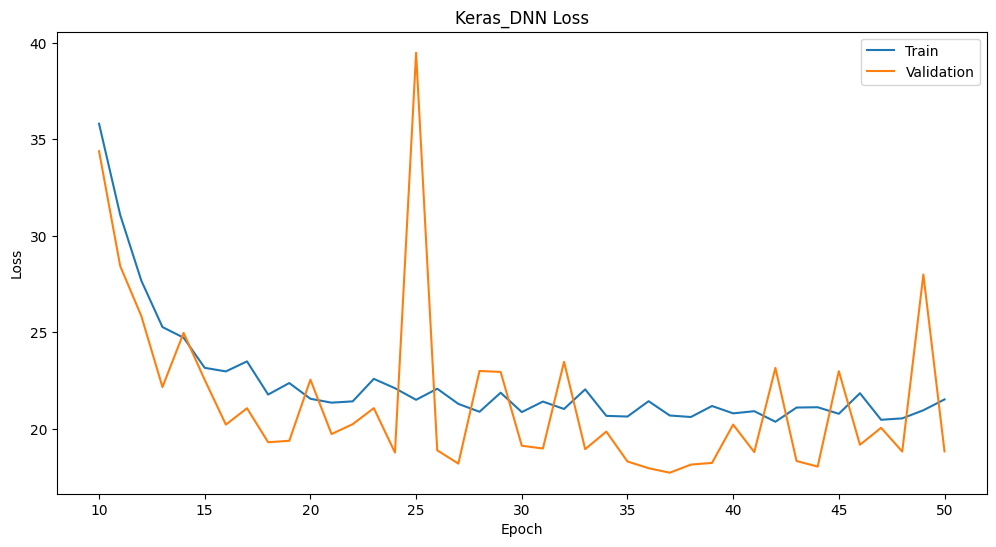

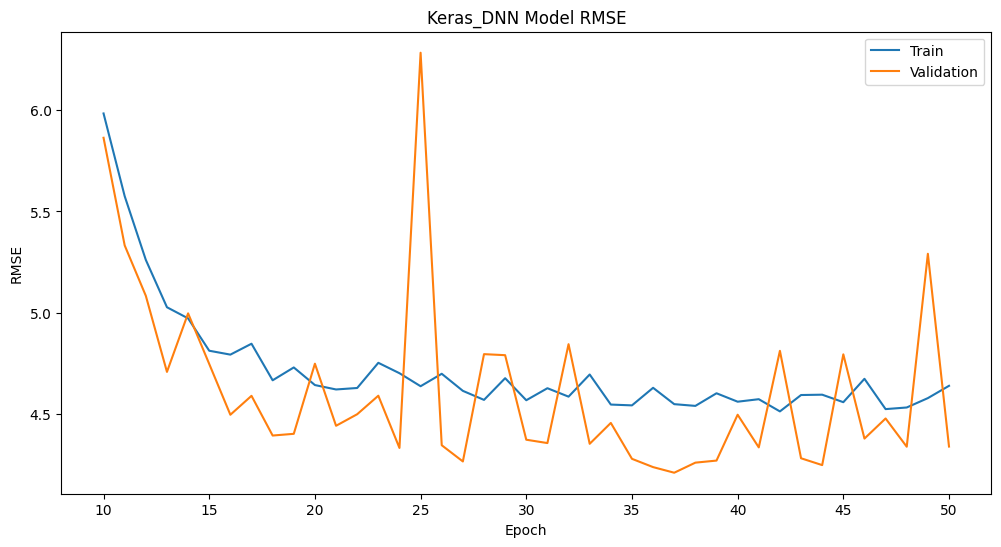

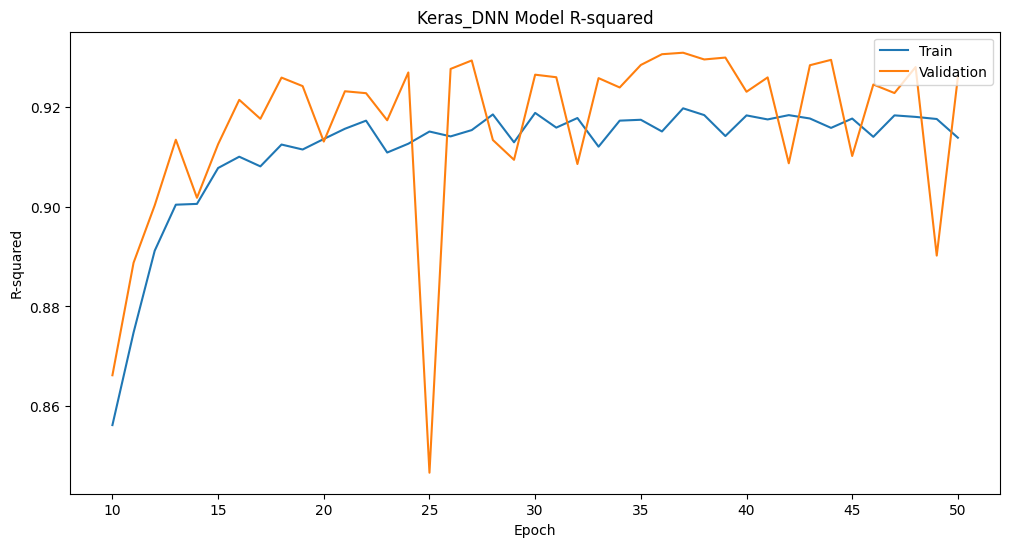

In [ ]:
# Show training graphs
show_training_graphs(history_keras_DNN, "Keras_DNN")

In [ ]:
# Define Model
# Regularisation has been added to prevent overfitting


DNN = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, input_shape=(Xtrain.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(units=34, kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(units=1, kernel_regularizer=regularizers.l2(0.01))
])


In [ ]:
# Compile model

DNN.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=[r_squared, 'mean_absolute_error', 'mean_squared_error', tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Train model

history_DNN = DNN.fit(Xtrain, Ytrain, epochs = epochs, batch_size = batch_size, validation_data=(X_val, Y_val))

Epoch 1/50
419/419 [==============================] - 3s 4ms/step - loss: 109752.2500 - r_squared: -437.9292 - mean_absolute_error: 295.4946 - mean_squared_error: 109749.3516 - root_mean_squared_error: 331.2844 - val_loss: 9536.6426 - val_r_squared: -35.9752 - val_mean_absolute_error: 82.3648 - val_mean_squared_error: 9530.7256 - val_root_mean_squared_error: 97.6254
Epoch 2/50
419/419 [==============================] - 1s 3ms/step - loss: 5194.1948 - r_squared: -20.0938 - mean_absolute_error: 58.8924 - mean_squared_error: 5188.1387 - root_mean_squared_error: 72.0287 - val_loss: 1955.3220 - val_r_squared: -6.3795 - val_mean_absolute_error: 36.0294 - val_mean_squared_error: 1949.1476 - val_root_mean_squared_error: 44.1492
Epoch 3/50
419/419 [==============================] - 2s 5ms/step - loss: 1110.8511 - r_squared: -3.4443 - mean_absolute_error: 26.2251 - mean_squared_error: 1104.7007 - root_mean_squared_error: 33.2370 - val_loss: 541.4853 - val_r_squared: -1.0437 - val_mean_absolute_e

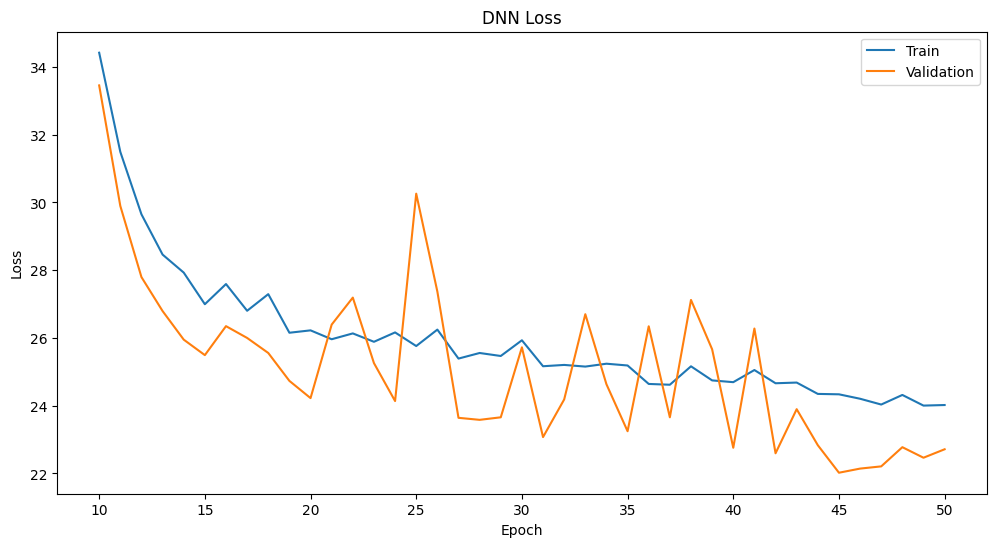

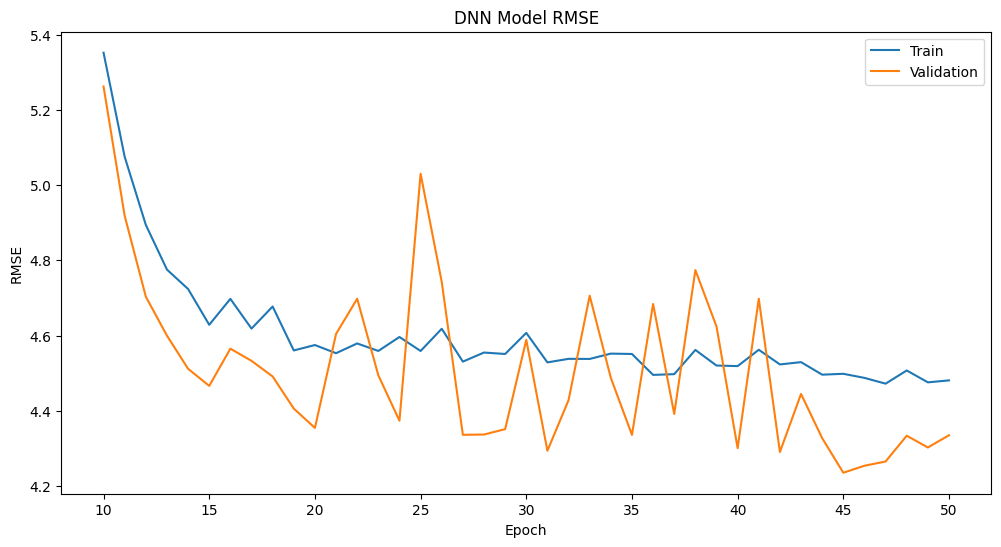

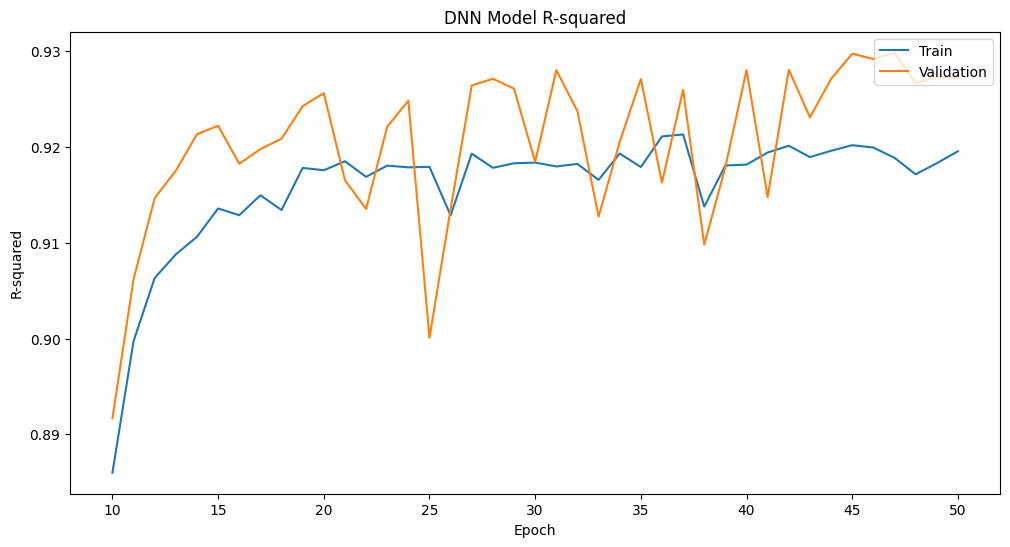

In [ ]:
# Show training graphs
show_training_graphs(history_DNN, "DNN")

In [ ]:
# Define, compile and train model

DNN2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, input_shape=(Xtrain.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(units=1, kernel_regularizer=regularizers.l2(0.01))
])

DNN2.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=[r_squared, 'mean_absolute_error', 'mean_squared_error', tf.keras.metrics.RootMeanSquaredError()])

history_DNN2 = DNN2.fit(Xtrain, Ytrain, epochs = epochs, batch_size = batch_size, validation_data=(X_val, Y_val))



Epoch 1/50
419/419 [==============================] - 2s 3ms/step - loss: 199272.7969 - r_squared: -793.5420 - mean_absolute_error: 445.9785 - mean_squared_error: 199272.6250 - root_mean_squared_error: 446.3996 - val_loss: 185394.8906 - val_r_squared: -717.3666 - val_mean_absolute_error: 430.1275 - val_mean_squared_error: 185394.2188 - val_root_mean_squared_error: 430.5743
Epoch 2/50
419/419 [==============================] - 1s 3ms/step - loss: 157273.4219 - r_squared: -627.6179 - mean_absolute_error: 395.1266 - mean_squared_error: 157271.7656 - root_mean_squared_error: 396.5750 - val_loss: 126185.3359 - val_r_squared: -490.0409 - val_mean_absolute_error: 353.8267 - val_mean_squared_error: 126182.7812 - val_root_mean_squared_error: 355.2222
Epoch 3/50
419/419 [==============================] - 2s 5ms/step - loss: 94443.6562 - r_squared: -376.5672 - mean_absolute_error: 302.5331 - mean_squared_error: 94439.8516 - root_mean_squared_error: 307.3107 - val_loss: 65111.5195 - val_r_squared:

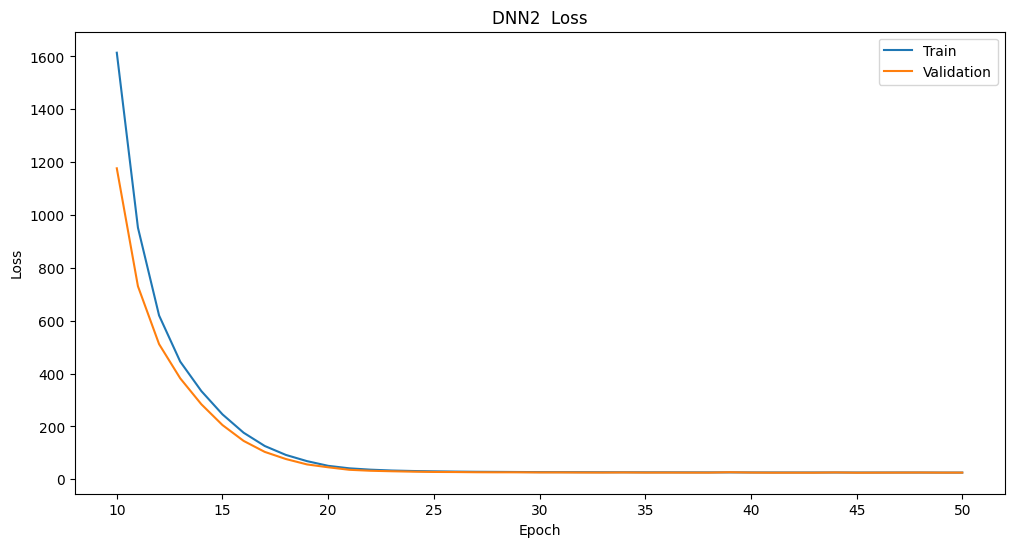

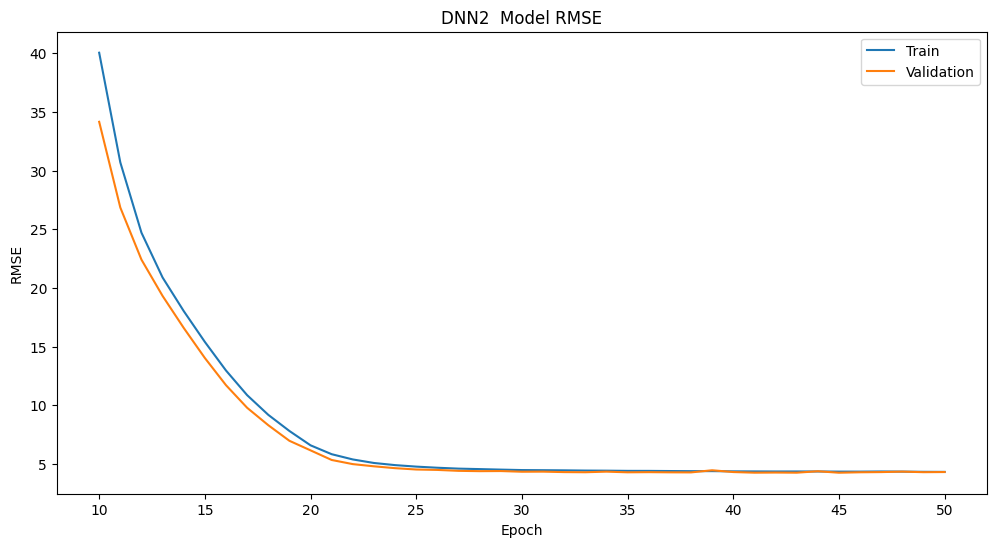

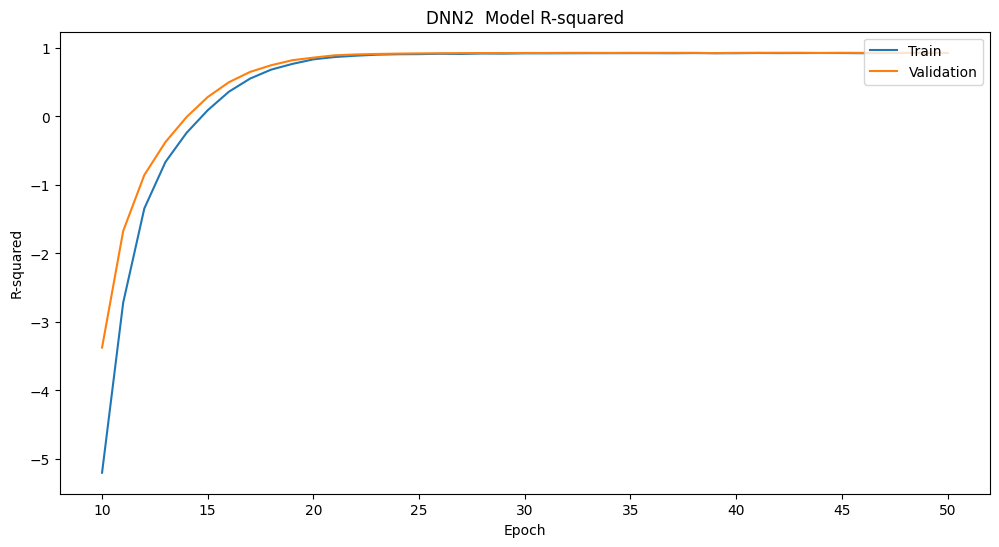

In [ ]:
# Show training graphs
show_training_graphs(history_DNN2, "DNN2 ")

# The slower convergence has meant that less detail can be seen of the curve giving the smoother appearance

In [ ]:
# Define, compile and train model

DNN3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, input_shape=(Xtrain.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(units=1, kernel_regularizer=regularizers.l2(0.01))
])

DNN3.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=[r_squared, 'mean_absolute_error', 'mean_squared_error', tf.keras.metrics.RootMeanSquaredError()])

history_DNN3 = DNN3.fit(Xtrain, Ytrain, epochs = epochs, batch_size = batch_size, validation_data=(X_val, Y_val))

Epoch 1/50
419/419 [==============================] - 3s 4ms/step - loss: 204252.1562 - r_squared: -821.2859 - mean_absolute_error: 451.5897 - mean_squared_error: 204251.9688 - root_mean_squared_error: 451.9424 - val_loss: 200923.3750 - val_r_squared: -776.9300 - val_mean_absolute_error: 447.8397 - val_mean_squared_error: 200923.1562 - val_root_mean_squared_error: 448.2445
Epoch 2/50
419/419 [==============================] - 1s 3ms/step - loss: 193563.1094 - r_squared: -771.4738 - mean_absolute_error: 439.3773 - mean_squared_error: 193562.7031 - root_mean_squared_error: 439.9576 - val_loss: 185979.3750 - val_r_squared: -719.3228 - val_mean_absolute_error: 430.5019 - val_mean_squared_error: 185978.7656 - val_root_mean_squared_error: 431.2526
Epoch 3/50
419/419 [==============================] - 1s 2ms/step - loss: 174712.7812 - r_squared: -691.7269 - mean_absolute_error: 416.7644 - mean_squared_error: 174711.8125 - root_mean_squared_error: 417.9854 - val_loss: 163976.9062 - val_r_squar

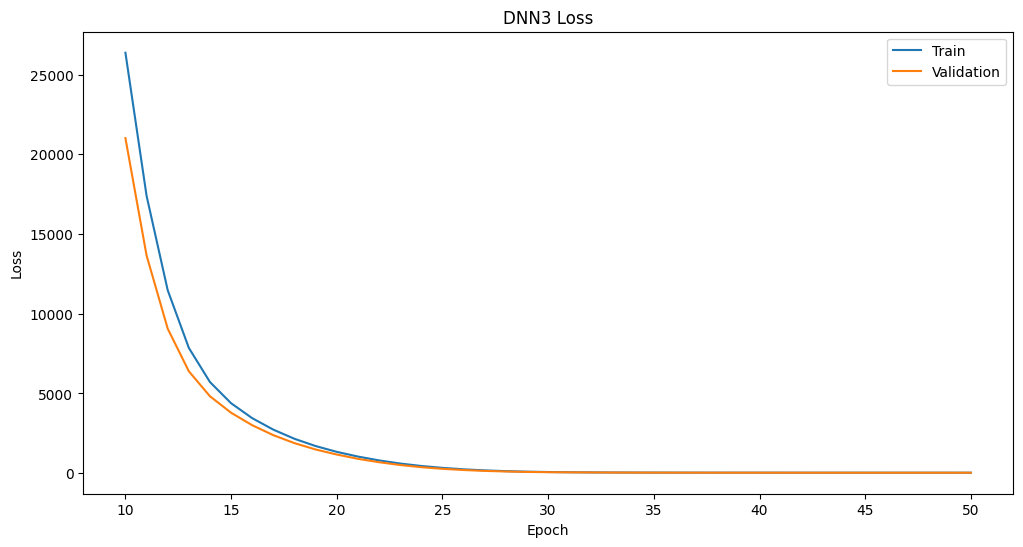

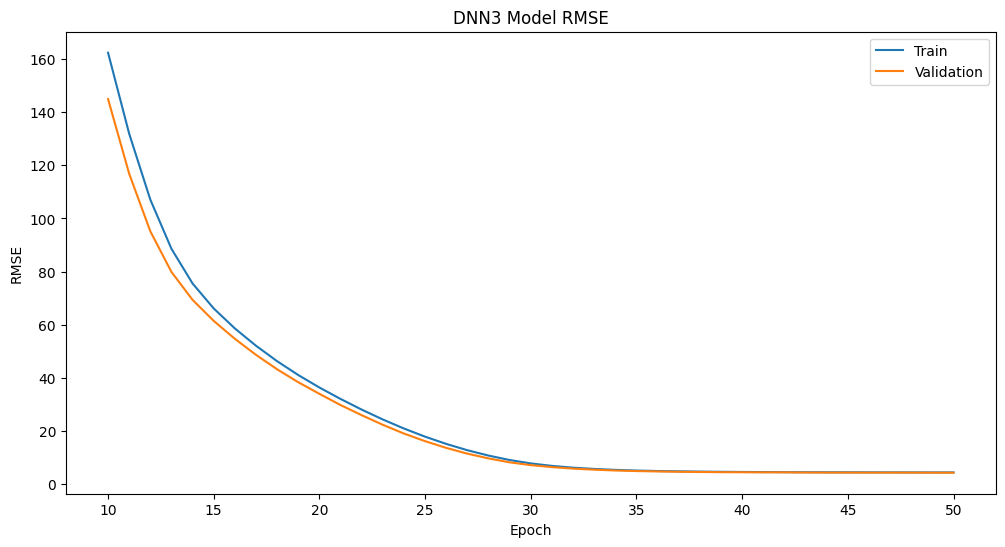

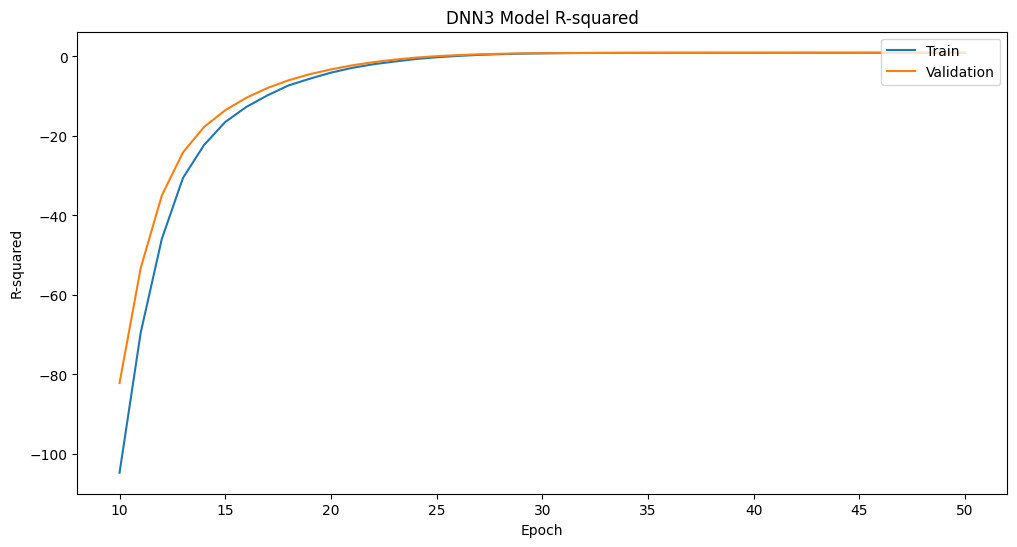

In [ ]:
# Show training graphs
show_training_graphs(history_DNN3, "DNN3")

In [ ]:
# Define, compile and train model

DNN4 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, input_shape=(Xtrain.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(units=1, kernel_regularizer=regularizers.l2(0.01))
])

DNN4.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mean_squared_error', metrics=[r_squared, 'mean_absolute_error', 'mean_squared_error', tf.keras.metrics.RootMeanSquaredError()])

history_DNN4 = DNN4.fit(Xtrain, Ytrain, epochs = epochs, batch_size = batch_size, validation_data=(X_val, Y_val))

Epoch 1/50
419/419 [==============================] - 2s 3ms/step - loss: 204249.9688 - r_squared: -807.7917 - mean_absolute_error: 451.6135 - mean_squared_error: 204249.8438 - root_mean_squared_error: 451.9401 - val_loss: 201650.4219 - val_r_squared: -779.8359 - val_mean_absolute_error: 448.7344 - val_mean_squared_error: 201650.1719 - val_root_mean_squared_error: 449.0547
Epoch 2/50
419/419 [==============================] - 1s 3ms/step - loss: 196212.5469 - r_squared: -775.6989 - mean_absolute_error: 442.6445 - mean_squared_error: 196212.2188 - root_mean_squared_error: 442.9585 - val_loss: 190714.9219 - val_r_squared: -738.0349 - val_mean_absolute_error: 436.4331 - val_mean_squared_error: 190714.3906 - val_root_mean_squared_error: 436.7086
Epoch 3/50
419/419 [==============================] - 1s 3ms/step - loss: 182657.7031 - r_squared: -728.6384 - mean_absolute_error: 427.0797 - mean_squared_error: 182656.9375 - root_mean_squared_error: 427.3838 - val_loss: 174411.8594 - val_r_squar

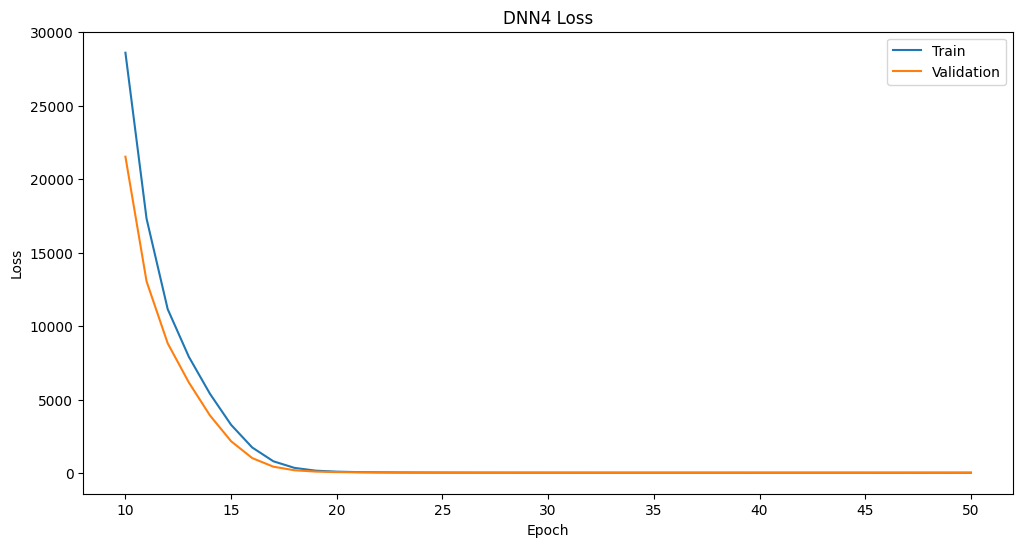

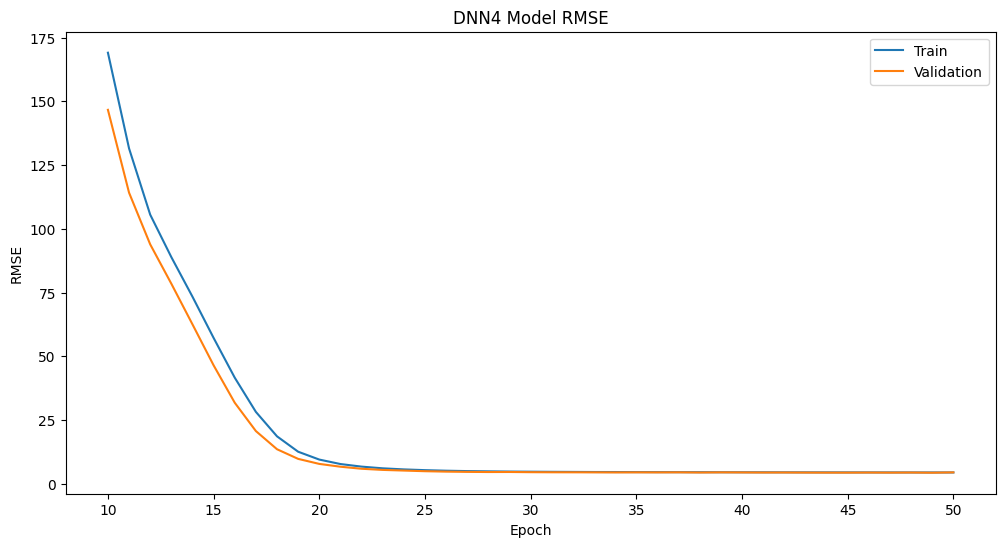

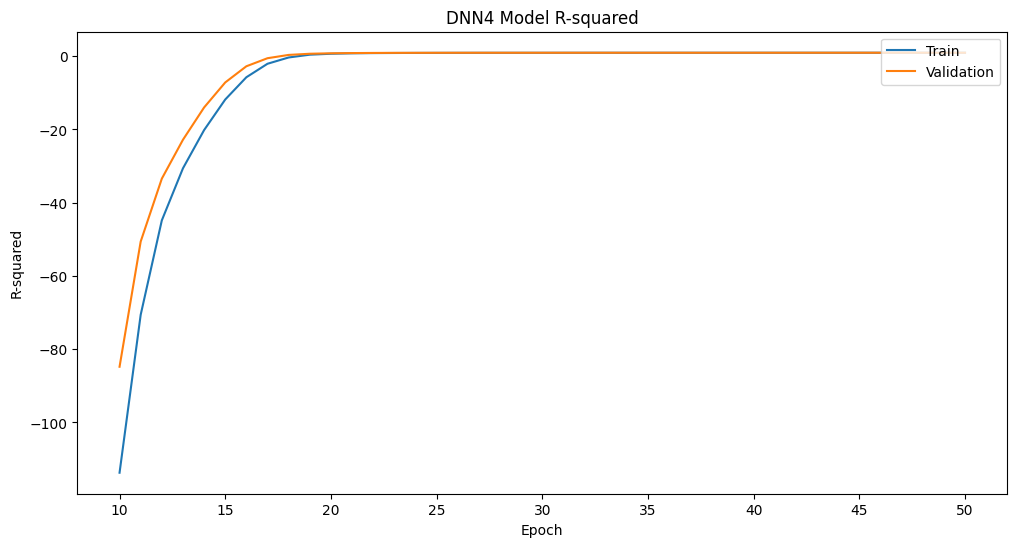

In [ ]:
# Show training graphs
show_training_graphs(history_DNN4, "DNN4")

In [ ]:
# Define, compile and train model

DNN5 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, input_shape=(Xtrain.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(units=8, kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(units=1, kernel_regularizer=regularizers.l2(0.01))
])

DNN5.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mean_squared_error', metrics=[r_squared, 'mean_absolute_error', 'mean_squared_error', tf.keras.metrics.RootMeanSquaredError()])

history_DNN5 = DNN5.fit(Xtrain, Ytrain, epochs = epochs, batch_size = batch_size, validation_data=(X_val, Y_val))

Epoch 1/50
419/419 [==============================] - 2s 3ms/step - loss: 199551.9062 - r_squared: -800.2479 - mean_absolute_error: 446.4381 - mean_squared_error: 199551.4219 - root_mean_squared_error: 446.7118 - val_loss: 186445.6562 - val_r_squared: -721.8920 - val_mean_absolute_error: 431.6415 - val_mean_squared_error: 186445.0938 - val_root_mean_squared_error: 431.7929
Epoch 2/50
419/419 [==============================] - 1s 3ms/step - loss: 154597.8125 - r_squared: -614.8961 - mean_absolute_error: 391.6709 - mean_squared_error: 154596.9688 - root_mean_squared_error: 393.1882 - val_loss: 112481.0547 - val_r_squared: -438.2240 - val_mean_absolute_error: 333.5956 - val_mean_squared_error: 112479.6250 - val_root_mean_squared_error: 335.3798
Epoch 3/50
419/419 [==============================] - 1s 3ms/step - loss: 63888.5000 - r_squared: -261.8519 - mean_absolute_error: 237.4302 - mean_squared_error: 63886.3867 - root_mean_squared_error: 252.7576 - val_loss: 21400.4395 - val_r_squared:

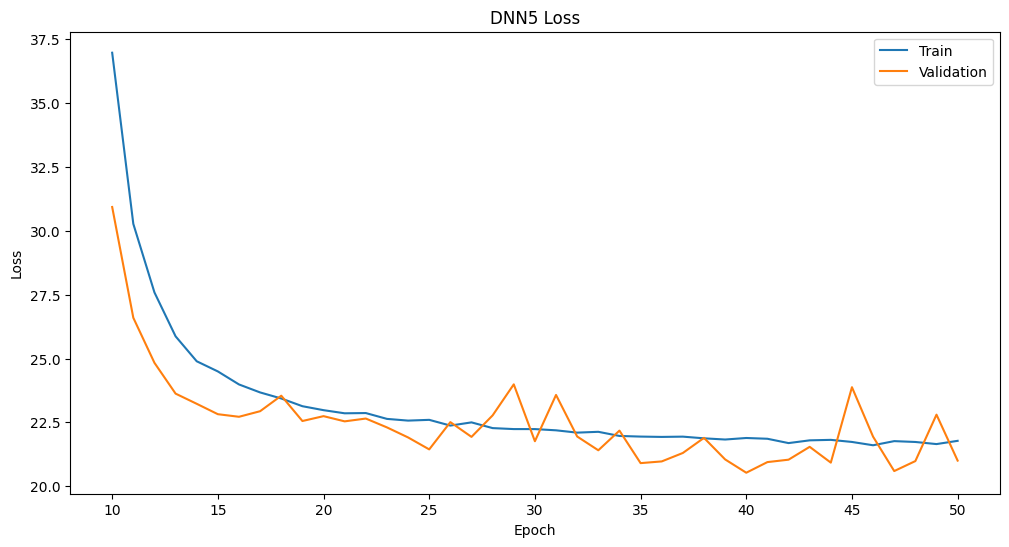

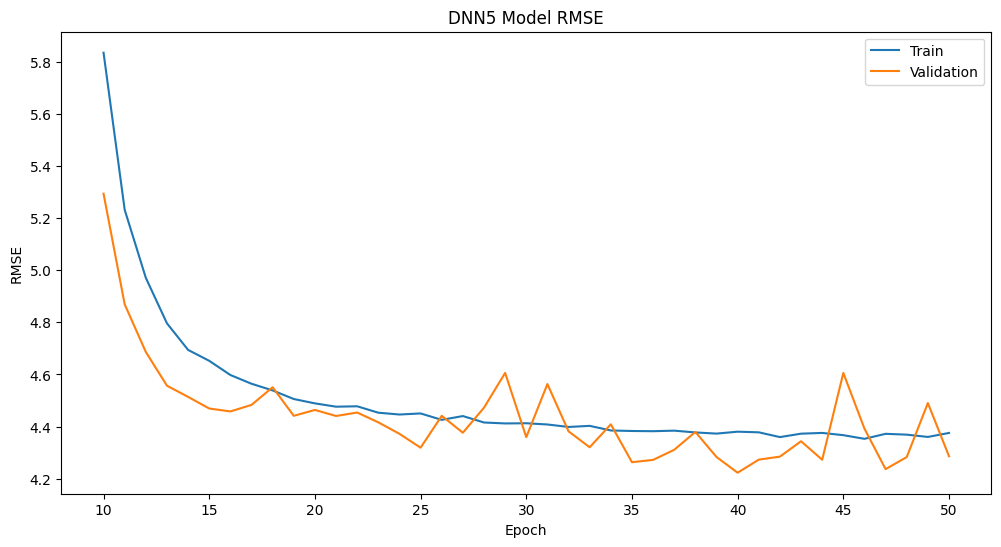

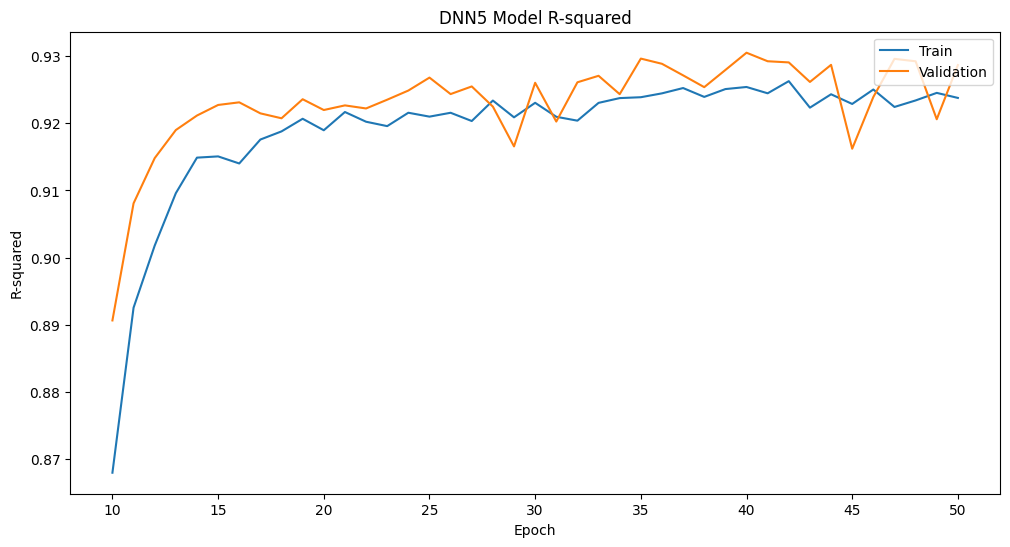

In [ ]:
# Define, compile and train model

# Show training graphs
show_training_graphs(history_DNN5, "DNN5")

In [ ]:
# Define, compile and train model

DNN6 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, input_shape=(Xtrain.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(units=1, kernel_regularizer=regularizers.l2(0.01))
])

DNN6.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='huber_loss', metrics=[r_squared, 'mean_absolute_error', 'mean_squared_error', tf.keras.metrics.RootMeanSquaredError()])

history_DNN6 = DNN6.fit(Xtrain, Ytrain, epochs = epochs, batch_size = batch_size, validation_data=(X_val, Y_val))

Epoch 1/50
419/419 [==============================] - 2s 3ms/step - loss: 451.6763 - r_squared: -820.0214 - mean_absolute_error: 452.0728 - mean_squared_error: 204681.1094 - root_mean_squared_error: 452.4170 - val_loss: 449.8041 - val_r_squared: -784.7682 - val_mean_absolute_error: 450.1544 - val_mean_squared_error: 202960.4531 - val_root_mean_squared_error: 450.5113
Epoch 2/50
419/419 [==============================] - 1s 3ms/step - loss: 445.7098 - r_squared: -792.5873 - mean_absolute_error: 445.9714 - mean_squared_error: 199225.4688 - root_mean_squared_error: 446.3468 - val_loss: 442.2100 - val_r_squared: -758.1298 - val_mean_absolute_error: 442.3645 - val_mean_squared_error: 196031.4844 - val_root_mean_squared_error: 442.7544
Epoch 3/50
419/419 [==============================] - 2s 4ms/step - loss: 436.3148 - r_squared: -761.1556 - mean_absolute_error: 436.3296 - mean_squared_error: 190759.8438 - root_mean_squared_error: 436.7606 - val_loss: 431.0611 - val_r_squared: -719.8478 - va

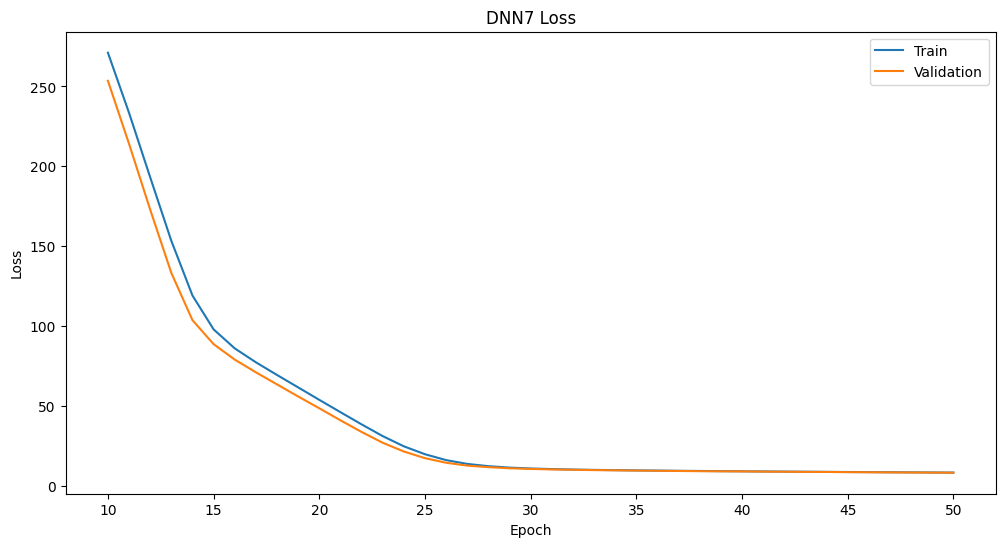

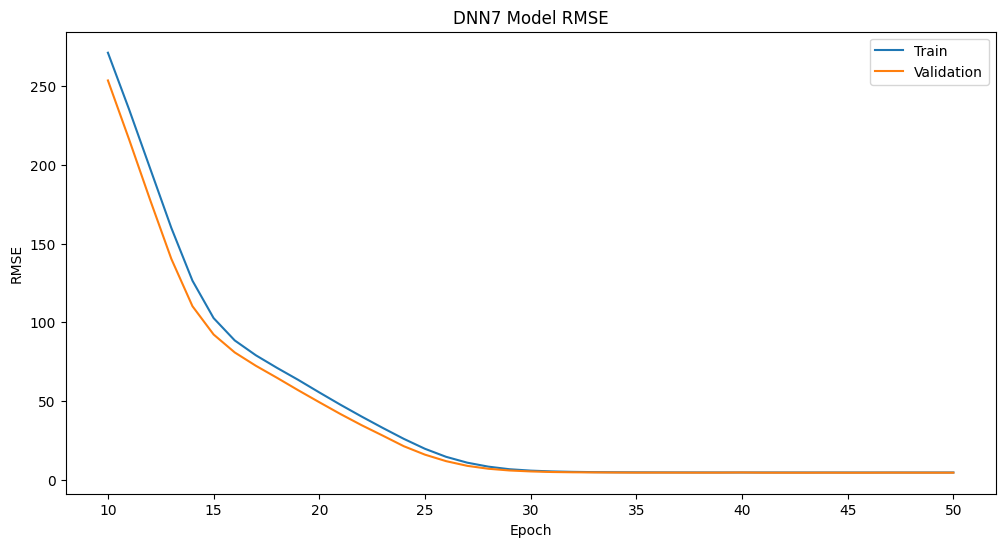

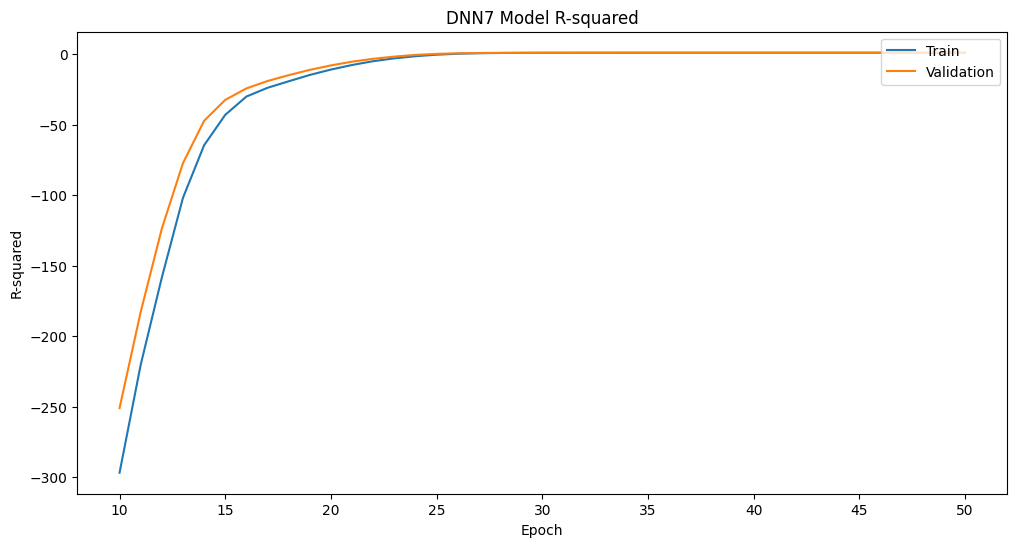

In [ ]:

# Show training graphs
show_training_graphs(history_DNN6, "DNN7")

In [ ]:
# Define, compile and train model

DNN7 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, input_shape=(Xtrain.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(units=1, kernel_regularizer=regularizers.l2(0.01))
])

DNN7.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mean_absolute_error', metrics=[r_squared, 'mean_absolute_error', 'mean_squared_error', tf.keras.metrics.RootMeanSquaredError()])

history_DNN7 = DNN7.fit(Xtrain, Ytrain, epochs = epochs, batch_size = batch_size, validation_data=(X_val, Y_val))

Epoch 1/50
419/419 [==============================] - 2s 3ms/step - loss: 451.4295 - r_squared: -813.7070 - mean_absolute_error: 451.3095 - mean_squared_error: 203938.9219 - root_mean_squared_error: 451.5960 - val_loss: 448.6692 - val_r_squared: -778.8441 - val_mean_absolute_error: 448.4770 - val_mean_squared_error: 201379.3906 - val_root_mean_squared_error: 448.7531
Epoch 2/50
419/419 [==============================] - 1s 3ms/step - loss: 443.2887 - r_squared: -761.9044 - mean_absolute_error: 442.9781 - mean_squared_error: 196487.1875 - root_mean_squared_error: 443.2688 - val_loss: 437.9060 - val_r_squared: -741.4130 - val_mean_absolute_error: 437.4557 - val_mean_squared_error: 191630.7188 - val_root_mean_squared_error: 437.7565
Epoch 3/50
419/419 [==============================] - 1s 3ms/step - loss: 429.8588 - r_squared: -735.0200 - mean_absolute_error: 429.2250 - mean_squared_error: 184564.4219 - root_mean_squared_error: 429.6096 - val_loss: 421.6732 - val_r_squared: -686.9490 - va

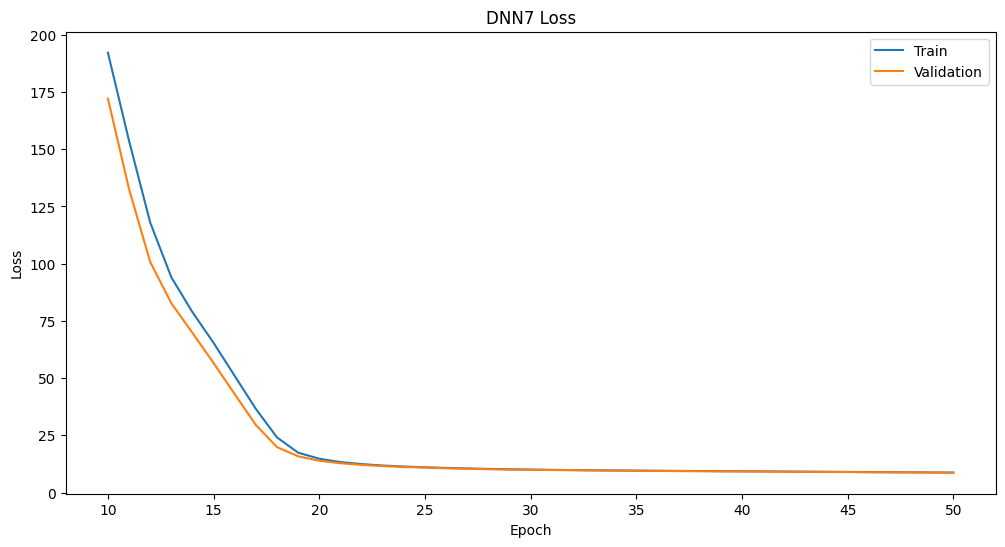

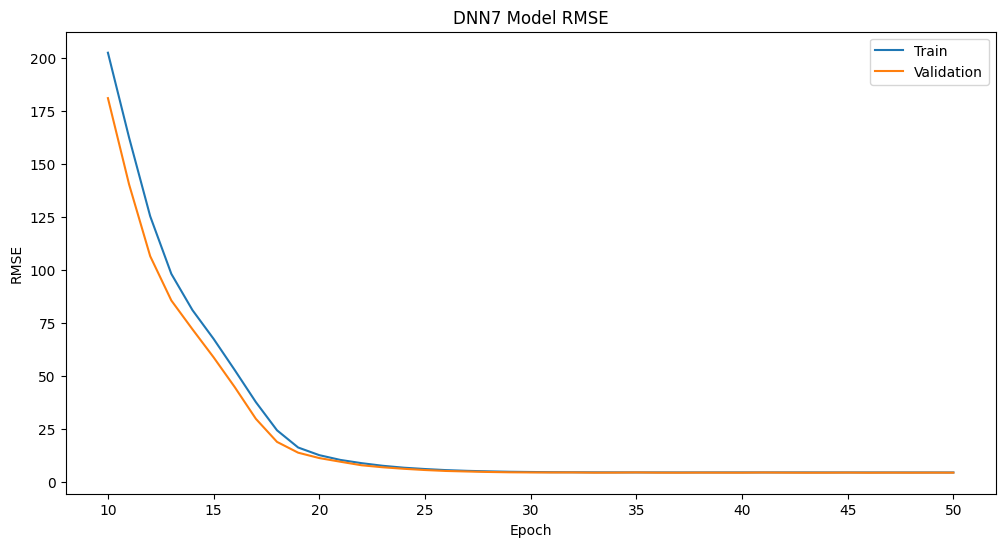

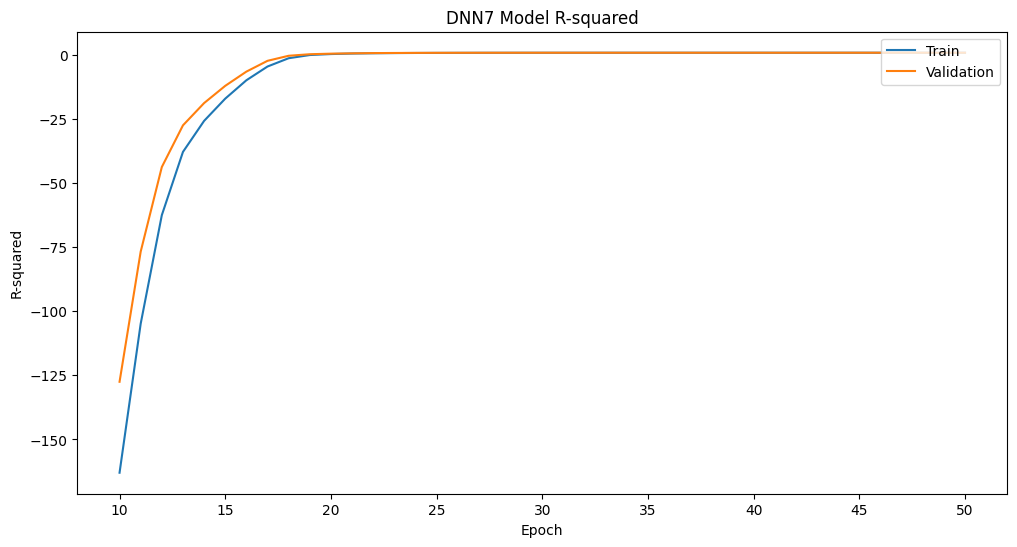

In [ ]:
# Show training graphs
show_training_graphs(history_DNN7, "DNN7")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math


# Create KNN regressor
knn = KNeighborsRegressor()

# Fit the model to the training data
knn.fit(Xtrain, Ytrain)

# Make predictions on the test data
y_pred = knn.predict(X_val)

# Calculate metrics
mse = mean_squared_error(Y_val, y_pred)
r2 = r2_score(Y_val, y_pred)
RMSE = math.sqrt(mse)

print('MSE:', mse)
print('R2 Score:', r2)
print("RMSE: ", RMSE)


MSE: 14.72654847386759
R2 Score: 0.9501586761059064
RMSE:  3.8375185307523387


In [ ]:
# Imports
from sklearn.model_selection import GridSearchCV

#parameter grid
param_grid = {
    'n_neighbors': list(range(1, 25)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create a default model
knn = KNeighborsRegressor()

# Instantiate
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the trainign dataset
grid_search.fit(Xtrain, Ytrain)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters: ", best_params)


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Create KNN regressor with the new optimised parameters
knn = KNeighborsRegressor(metric="manhattan", n_neighbors = 8, weights="distance")

# Fit the model to the training data
knn.fit(Xtrain, Ytrain)

# Make predictions on the validation data
y_pred = knn.predict(X_val)

# metrics
mse = mean_squared_error(Y_val, y_pred)
RMSE = math.sqrt(mse)
r2 = r2_score(Y_val, y_pred)

print('MSE:', mse)
print('RSME:', RMSE)
print('R2 Score:', r2)



MSE: 13.336452383173409
RSME: 3.651910785215516
R2 Score: 0.9548633921921739


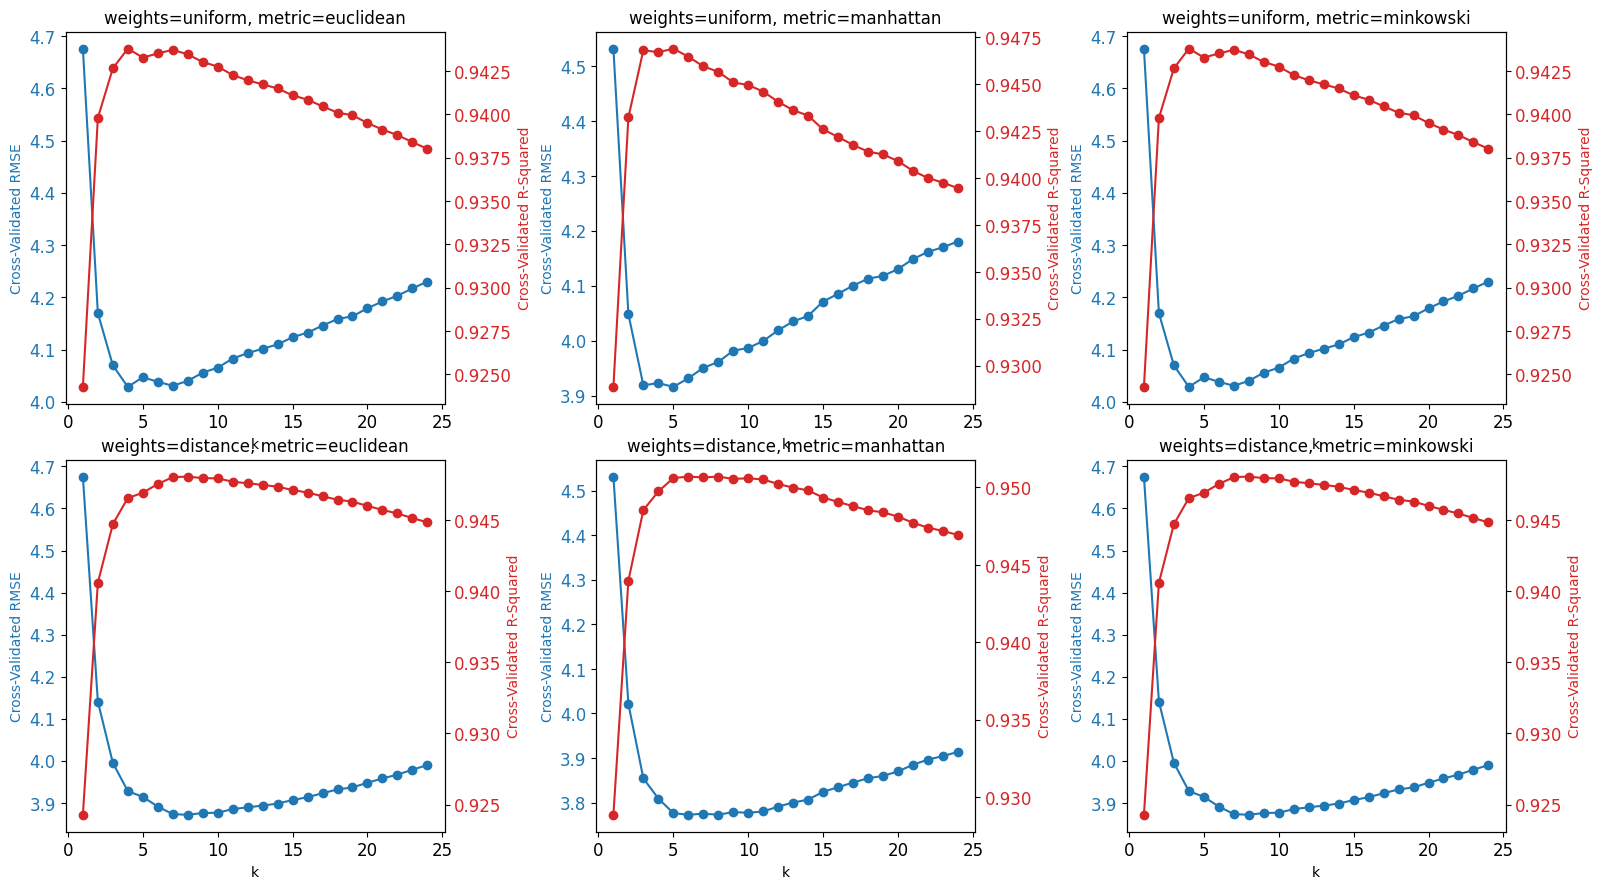

In [ ]:
# Some code to plot the resutls to the gridsearch


# Define the hyperparameters to test
weights_values = ['uniform', 'distance']
metric_values = ['euclidean', 'manhattan', 'minkowski']

# Define the range of k values to test
k_values = range(1, 25)

# Create subplots
fig, axs = plt.subplots(len(weights_values), len(metric_values), figsize=(18, 10))

# Adjust the spacing between subplots
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.15)

for i, weights in enumerate(weights_values):
    for j, metric in enumerate(metric_values):
        rmse_values = []
        r2_values = []

        # For each value of k
        for k in k_values:

            knn = KNeighborsRegressor(metric=metric, n_neighbors=k, weights=weights)
            # Perform cross-validation and compute the mean squared error
            mse_scores = cross_val_score(knn, Xtrain, Ytrain, cv=5, scoring='neg_mean_squared_error')
            rmse_values.append(np.sqrt(-mse_scores.mean()))
            r2_scores = cross_val_score(knn, Xtrain, Ytrain, cv=5, scoring='r2')
            r2_values.append(r2_scores.mean())

        # Plot RMSE values
        color = 'tab:blue'
        axs[i, j].set_xlabel('k')
        axs[i, j].set_ylabel('Cross-Validated RMSE', color=color)
        axs[i, j].plot(k_values, rmse_values, color=color, marker='o')
        axs[i, j].tick_params(axis='y', labelcolor=color, labelsize=12)
        axs[i, j].tick_params(axis='x', labelsize=12)
        axs[i, j].set_title(f'weights={weights}, metric={metric}')

        #  new y-axis for the R2 scores
        ax2 = axs[i, j].twinx()
        color = 'tab:red'
        ax2.set_ylabel('Cross-Validated R-Squared', color=color)
        ax2.plot(k_values, r2_values, color=color, marker='o')
        ax2.tick_params(axis='y', labelcolor=color, labelsize=12)


plt.show()


# Make predictions on Test set for model comparison.

In [ ]:
import pandas as pd
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score


# Dummy and KNN evaluation on unseen test set

# Initialize models
models = {
    "Dummy": DummyRegressor(strategy='mean'),
    "KNN: ": KNeighborsRegressor(metric="manhattan", n_neighbors = 8, weights="distance")
}

# Train and evaluate models
for name, model in models.items():
    model.fit(Xtrain, Ytrain)
    predictions = model.predict(X_test)
    mse = mean_squared_error(Y_test, predictions)
    RSME = math.sqrt(mse)
    r2 = r2_score(Y_test, predictions)
    print(f"{name} - MSE: {mse}, R2 Score: {r2}, RMSE: {RSME}")


Dummy - MSE: 298.03685250316414, R2 Score: -0.00020401197730102183, RMSE: 17.263743872728305
KNN:  - MSE: 10.761337382940342, R2 Score: 0.9638852285069547, RMSE: 3.2804477412298985


In [ ]:
# KNN evaluation on test set


# Create KNN regressor
knn = KNeighborsRegressor(metric="manhattan", n_neighbors = 8, weights="distance")

# Fit the model to the training data
knn.fit(Xtrain, Ytrain)

# Predictions on the test data
y_pred = knn.predict(X_test)

# Calculate metrics
mse = mean_squared_error(Y_test, y_pred)
RMSE = math.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print('MSE:', mse)
print('RSME:', RMSE)
print('R2 Score:', r2)

MSE: 10.761337382940342
RSME: 3.2804477412298985
R2 Score: 0.9638852285069547


In [ ]:
# DNN evaluation on test set

loss, r_squared_value, mean_absolute_error, mean_squared_error, root_mean_squared_error = DNN7.evaluate(X_test, Y_test, verbose=0)

# print("Loss: ", loss)
print("R2: ", r_squared_value)
# print("MAE: ", mean_absolute_error)
# print("MSE: ", mean_squared_error)
print("RSME: ", root_mean_squared_error)

R2:  0.9425122141838074
RSME:  4.021576881408691
